In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import optuna
from optuna.trial import Trial

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/dados-chuva/inmetA711.parquet').rename({'timestamp':'data_hora'},axis=1).set_index('data_hora')

In [ ]:
df = df.rename({
'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'precipitacao_total_h',
'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)':'pressao_atm_est_h',
'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)':'pressao_max_h',
'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)':'pressao_min_h',
'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)':'temperatura_ar_bulbo_seco_h',
'TEMPERATURA DO PONTO DE ORVALHO (°C)':'temperatura_ponto_orvalho',
'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'temperatura_max_h',
'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)':'temperatura_min_h',
'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)':'temperatura_orvalho_max_h',
'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)':'temperatura_orvalho_min_h',
'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)':'umidade_max_h',
'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':'umidade_min_h',
'UMIDADE RELATIVA DO AR, HORARIA (%)':'umidade_ar_h',
'VENTO, DIREÇÃO HORARIA (gr) (° (gr))':'vento_direcao_h',
'VENTO, RAJADA MAXIMA (m/s)':'vento_rajada_max_h',
'VENTO, VELOCIDADE HORARIA (m/s)':'vento_velocidade_h'
},axis=1)

In [ ]:
df.head(2)

,precipitacao_total_h,pressao_atm_est_h,pressao_max_h,pressao_min_h,temperatura_ar_bulbo_seco_h,temperatura_ponto_orvalho,temperatura_max_h,temperatura_min_h,temperatura_orvalho_max_h,temperatura_orvalho_min_h,umidade_max_h,umidade_min_h,umidade_ar_h,vento_direcao_h,vento_rajada_max_h,vento_velocidade_h
data_hora,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1.4,918.1,918.1,917.3,20.7,19.5,20.7,20.4,19.6,19.3,94.0,93.0,93.0,147.0,4.0,0.0
2016-01-01 01:00:00,0.2,918.7,918.7,918.1,20.5,19.4,20.7,20.3,19.6,19.2,93.0,93.0,93.0,47.0,2.8,0.7


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitacao_total_h,62099.0,0.174711,1.378361,0.0,0.0,0.0,0.0,73.8
pressao_atm_est_h,62099.0,920.217440,3.449702,907.6,917.8,920.0,922.5,932.2
pressao_max_h,62099.0,920.477056,3.424918,908.1,918.1,920.2,922.7,932.3
pressao_min_h,62099.0,919.958877,3.465216,907.5,917.6,919.7,922.2,931.9
temperatura_ar_bulbo_seco_h,62099.0,21.157813,4.685866,2.8,18.2,20.9,24.4,37.4
temperatura_ponto_orvalho,62092.0,14.276635,4.303009,-9.8,11.3,15.1,17.8,23.4
temperatura_max_h,62099.0,21.851297,4.831350,3.4,18.7,21.6,25.3,38.7
temperatura_min_h,62099.0,20.505746,4.534214,2.7,17.7,20.4,23.5,36.3
temperatura_orvalho_max_h,62098.0,14.837310,4.257816,-9.7,11.8,15.6,18.3,23.5
temperatura_orvalho_min_h,62086.0,13.757190,4.370473,-10.0,10.7,14.7,17.4,21.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62099 entries, 2016-01-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precipitacao_total_h         62099 non-null  float64
 1   pressao_atm_est_h            62099 non-null  float64
 2   pressao_max_h                62099 non-null  float64
 3   pressao_min_h                62099 non-null  float64
 4   temperatura_ar_bulbo_seco_h  62099 non-null  float64
 5   temperatura_ponto_orvalho    62092 non-null  float64
 6   temperatura_max_h            62099 non-null  float64
 7   temperatura_min_h            62099 non-null  float64
 8   temperatura_orvalho_max_h    62098 non-null  float64
 9   temperatura_orvalho_min_h    62086 non-null  float64
 10  umidade_max_h                62099 non-null  float64
 11  umidade_min_h                62099 non-null  float64
 12  umidade_ar_h                 62099 non-

In [ ]:
# VARIAVEIS SAZONAIS
df['hora'] = df.index.hour
df['mes'] = df.index.month
df['trimestre'] = df.index.quarter

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# salvar os componentes, decomposição da série temporal
result = seasonal_decompose(df.precipitacao_total_h,period=8760)
# cores componentes
c = ['#F99901','#06C3C6','#E1BF00','#F10502']

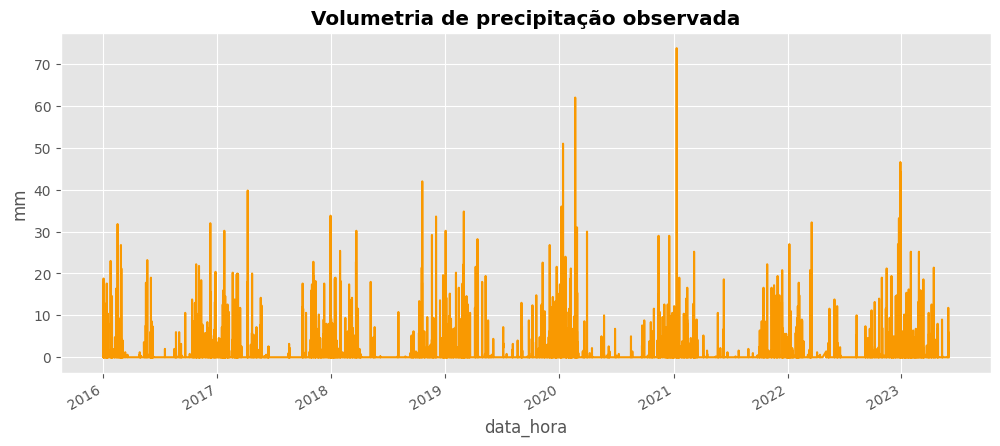

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Volumetria de precipitação observada",fontweight='bold')
result.observed.plot(ax=ax,ylabel ='mm',color=c[0])
plt.show()
plt.savefig('Volumetria de precipitação observada.png', format='png')


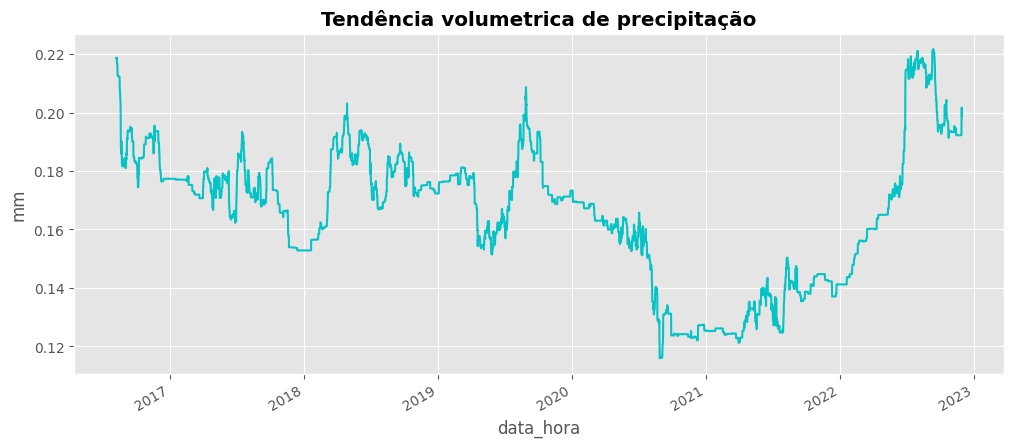

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Tendência volumetrica de precipitação",fontweight='bold')
result.trend.plot(ax=ax,ylabel='mm',color=c[1])
plt.show()
plt.savefig('Tendência volumetrica de precipitação.png', format='png')


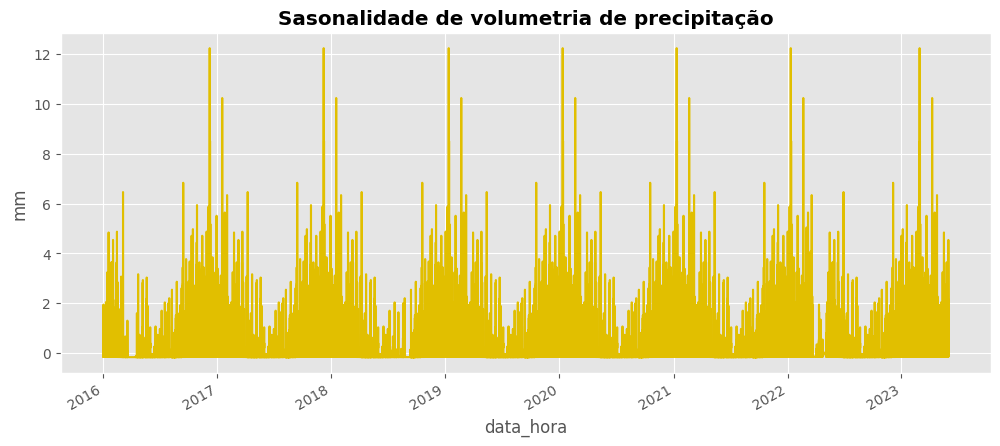

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
result.seasonal.plot(ax=ax,ylabel='mm',color=c[2])
plt.title("Sazonalidade de volumetria de precipitação",fontweight='bold')
plt.show()
plt.savefig('Sazonalidade de volumetria de precipitação.png', format='png')


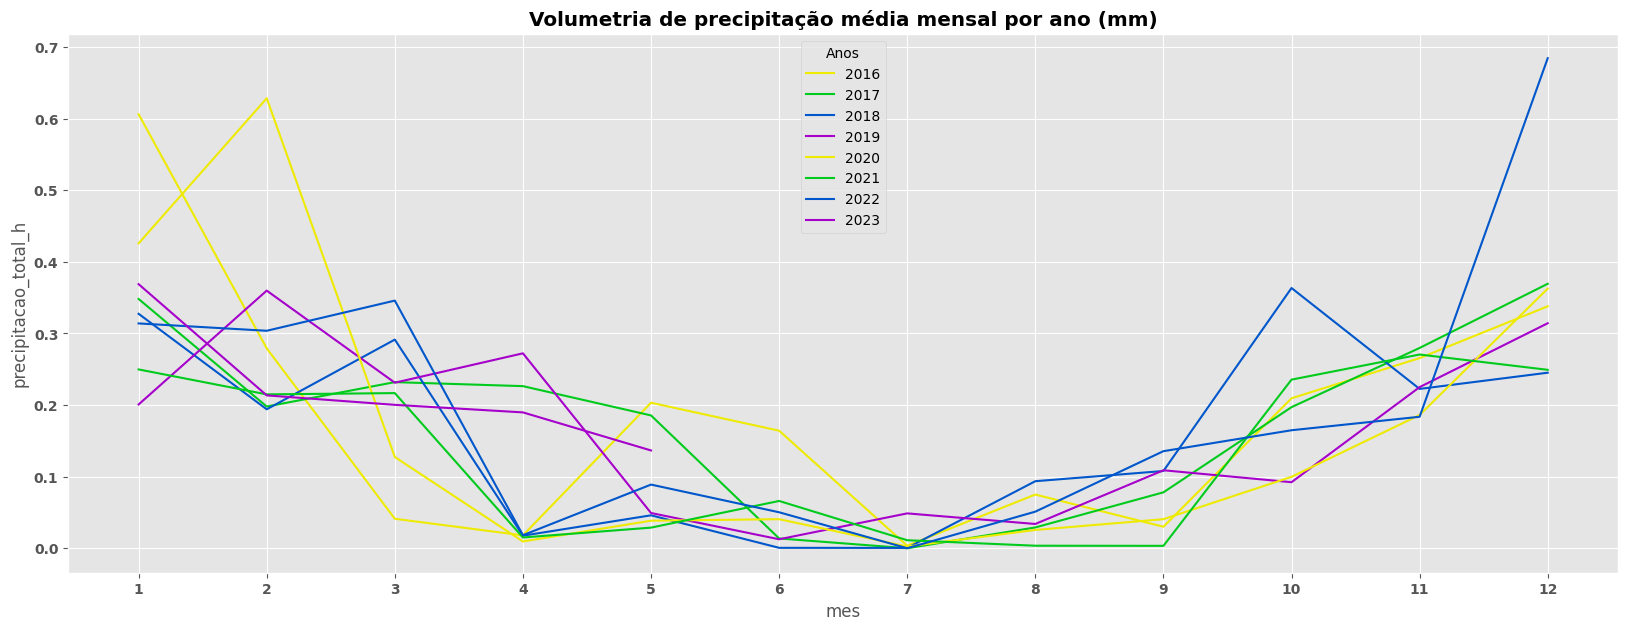

<Figure size 640x480 with 0 Axes>

In [ ]:
data = df.groupby([df.index.year,df.mes]).precipitacao_total_h.mean().reset_index()
colors = ['#EEEA02','#00CB1C','#0056CB','#A600CB']
plt.subplots(figsize=(20,7))
sns.lineplot(data=data,x='mes',y='precipitacao_total_h', hue="data_hora",palette=colors)
plt.legend(title = 'Anos')
plt.yticks(fontweight='bold')
plt.xticks(data.mes.unique(),fontweight='bold')
plt.title("Volumetria de precipitação média mensal por ano (mm)",fontweight='bold')
plt.show()
plt.savefig('Volumetria de precipitação média mensal por ano (mm).png', format='png')


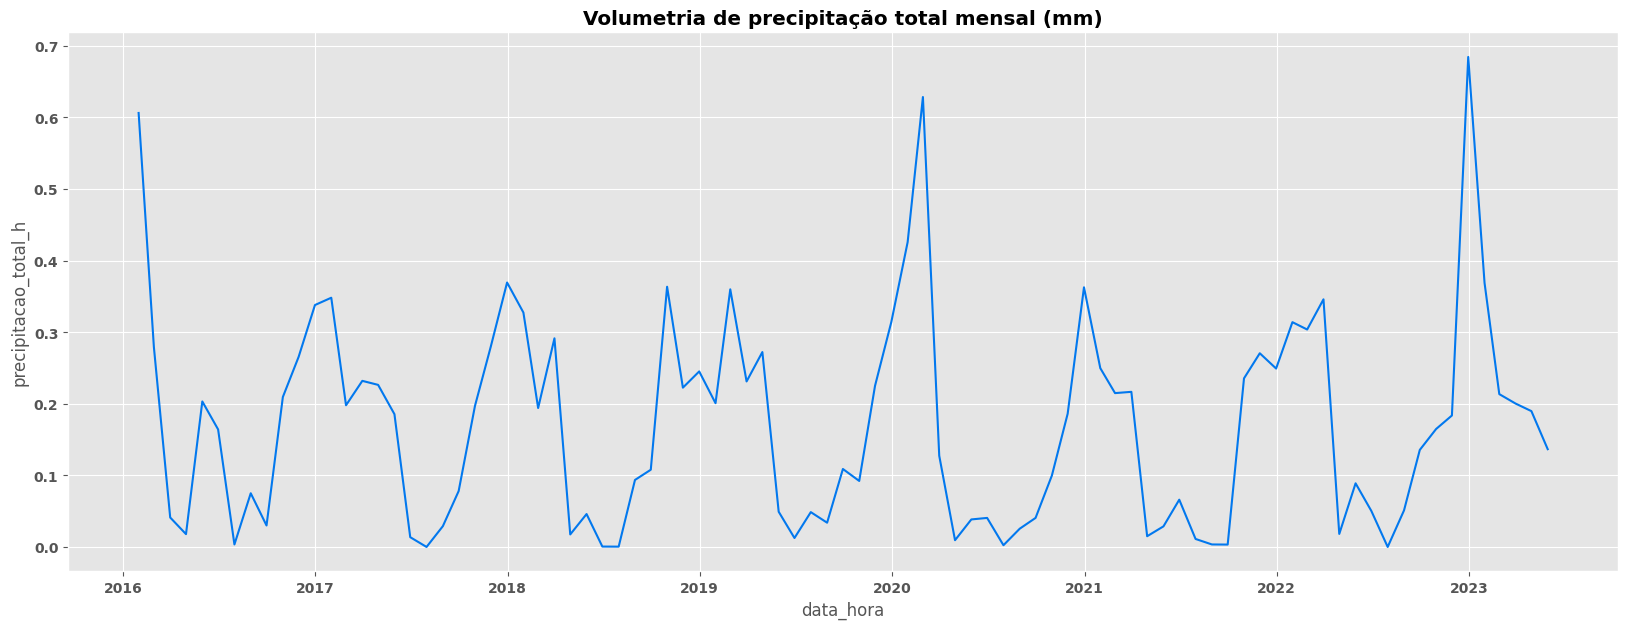

<Figure size 640x480 with 0 Axes>

In [ ]:
data_m = df.groupby(pd.Grouper(freq="M")).mean()

plt.subplots(figsize=(20,7))
sns.lineplot(x=data_m.index,y=data_m.precipitacao_total_h,color='#0278EE')
plt.title("Volumetria de precipitação total mensal (mm)",fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()
plt.savefig('Volumetria de precipitação total mensal (mm).png', format='png')

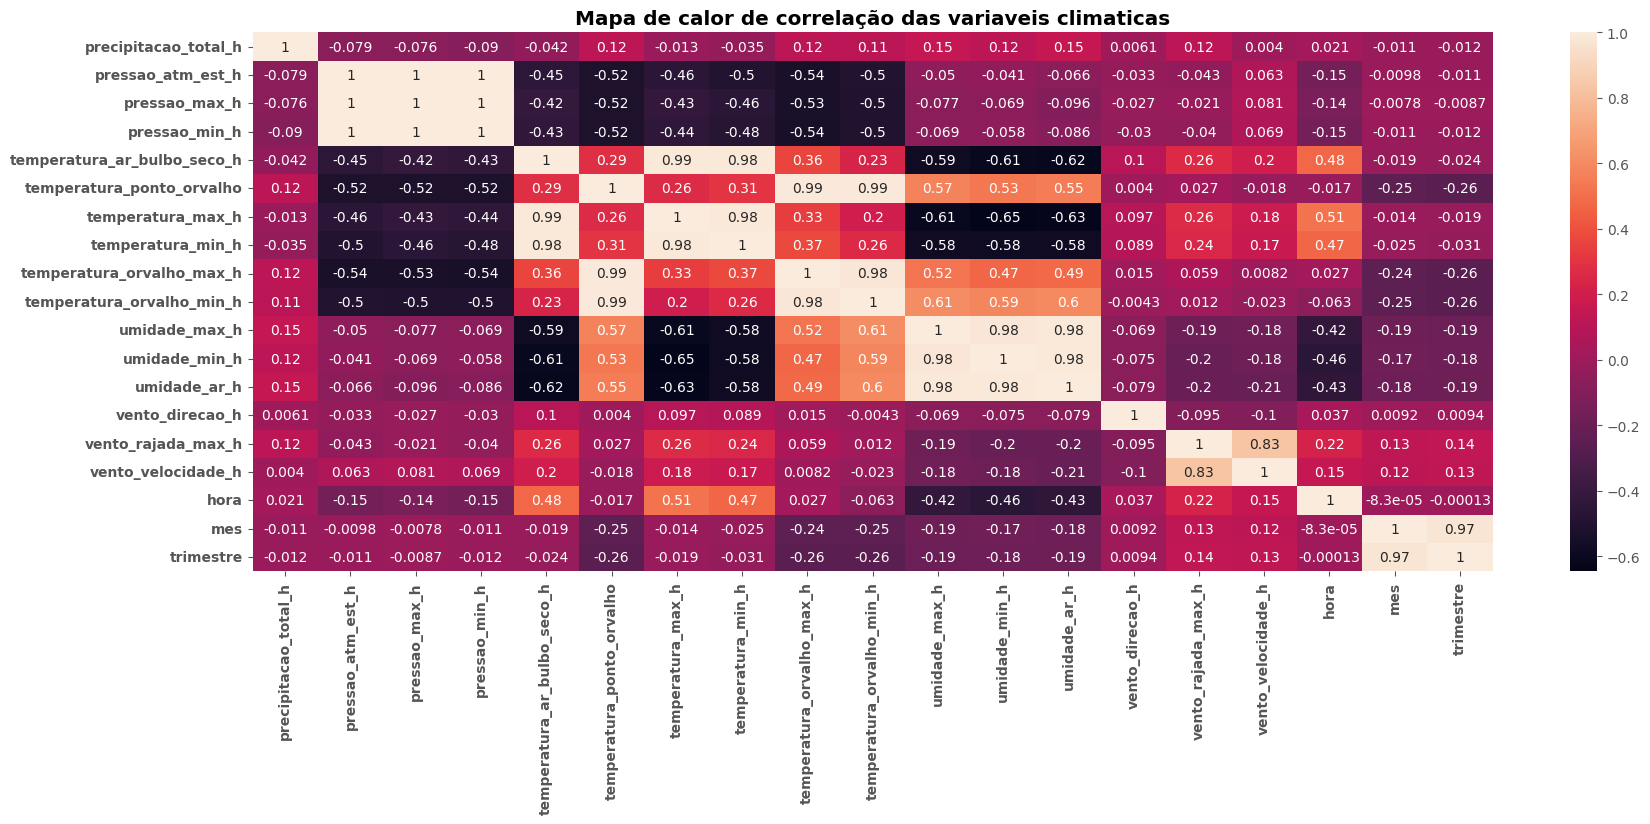

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplots(figsize=(20,7))
sns.heatmap(df.corr('pearson'),annot=True)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title("Mapa de calor de correlação das variaveis climaticas",fontweight='bold')
plt.show()
plt.savefig('Mapa de calor de correlação das variaveis climaticas.png', format='png')


# **REGRESSÃO DE ARVORE**

A regressão de árvore é um método de aprendizado de máquina que utiliza árvores de decisão para realizar previsões de variáveis contínuas, ou seja, para problemas de regressão. Nesse método, a árvore de decisão é construída a partir dos dados de treinamento, dividindo o conjunto de dados com base em determinados critérios nos nós internos da árvore, até chegar às folhas que contêm as previsões.

Cada nó interno da árvore representa uma decisão baseada em um atributo e um valor de corte. Dependendo da estrutura da árvore, o valor do atributo leva a uma ramificação para a esquerda ou direita, levando a subárvores diferentes. As folhas da árvore contêm as previsões, que são os valores médios (ou outros cálculos) das amostras de treinamento que chegam àquela folha.

> **Modelo utilizado:**

**XGBoost (Extreme Gradient Boosting)** é uma biblioteca de aprendizado de máquina baseada em árvore que utiliza o algoritmo de boosting para construir modelos preditivos de alta precisão. O XGBoost é conhecido por sua eficiência, desempenho e capacidade de lidar com uma variedade de problemas de aprendizado de máquina.

In [ ]:

import xgboost as xgb
from xgboost import DMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
# SEPARAÇÃO DOS DADOS
data1 = df.dropna()
x_dt1,y_dt1 = data1.drop(['precipitacao_total_h'],axis=1),data1.precipitacao_total_h
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_dt1,y_dt1,test_size=0.2,shuffle=False)

In [ ]:
# MATRIZ DOS DADOS
dtrain = DMatrix(x_train1,y_train1)
dtest = DMatrix(x_test1)

In [ ]:
# MODELO
%%time
params = {'tree_method': 'hist','eval_metric':'rmsle'}

model = xgb.train(params,
                  num_boost_round = 999,
                  dtrain=dtrain)

yhat1 = model.predict(dtest,ntree_limit = model.best_ntree_limit)

mae = mean_absolute_error(y_test1,yhat1)
mse = mean_squared_error(y_test1,yhat1)

CPU times: user 10.7 s, sys: 29.6 ms, total: 10.7 s
Wall time: 5.62 s


> MSE

O MSE é uma medida do erro médio quadrático entre as previsões do modelo e os valores reais do conjunto de dados. Ele calcula a diferença entre cada valor previsto e seu valor correspondente real, eleva essa diferença ao quadrado e tira a média desses quadrados.

In [ ]:
print(f"Mean square Error: {mse}")

Mean square Error: 1.6371132268722468


 > MAE

 O MAE é uma medida do erro médio absoluto entre as previsões do modelo e os valores reais
 do conjunto de dados. Ele calcula a diferença absoluta entre cada valor previsto
 e seu valor correspondente real, e em seguida, tira a média dessas diferenças.

In [ ]:
print(f"Mean Absolute Error:{mae}")

Mean Absolute Error:0.30417875124883836


> RMSE

O RMSE é calculado tomando a raiz quadrada do MSE (Mean Squared Error). O MSE é a
média das diferenças ao quadrado entre as previsões e os valores reais, enquanto
o RMSE é a raiz quadrada dessa média.


In [ ]:
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

Root Mean Squared Error: 1.279497255515715


O modelo apresentou um Mean Square Error (MSE) de 1.624, o que indica a média dos erros quadrados das previsões em relação aos valores reais. Quanto menor o valor do MSE, melhor é o desempenho do modelo, sugerindo que as previsões estão mais próximas dos valores reais. Nesse caso, o valor do MSE indica que o modelo tem uma quantidade moderada de erro quadrado médio.

Além disso, o Mean Absolute Error (MAE) foi calculado como 0.305. O MAE representa a média dos erros absolutos das previsões em relação aos valores reais. Um valor mais baixo do MAE indica que o modelo tem previsões mais precisas, com erros menores em magnitude. No caso apresentado, o valor do MAE sugere que o modelo tem um desempenho satisfatório, com erros absolutos médios relativamente baixos.

O Root Mean Squared Error (RMSE) foi calculado como 1.274. O RMSE é uma métrica semelhante ao MSE, porém é mais sensível a valores discrepantes, pois envolve a raiz quadrada dos erros quadrados. Quanto menor o valor do RMSE, melhor é o desempenho do modelo. Neste caso, o valor do RMSE indica que o modelo tem um nível moderado de erro médio em relação aos valores reais.

Em geral, com base nas métricas MSE, MAE e RMSE, podemos concluir que o modelo de regressão de árvore XGBoost apresenta um desempenho razoável na previsão da volumetria de precipitação. No entanto, é importante considerar o contexto específico da aplicação e avaliar as métricas em relação às necessidades e requisitos do problema em questão.

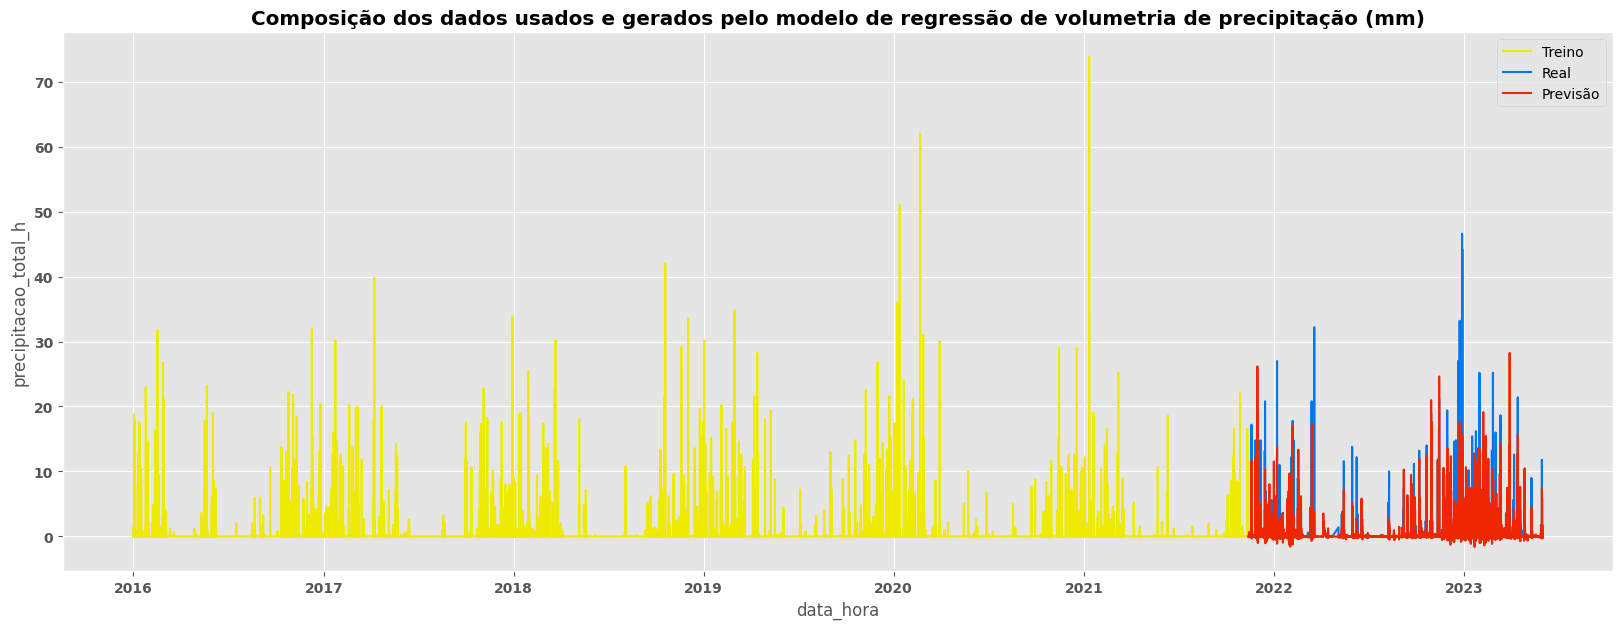

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplots(figsize=(20,7))
sns.lineplot(x=y_train1.index,y=y_train1,color='#EEEA02',label='Treino')
sns.lineplot(x=y_test1.index,y=y_test1,color='#0278EE',label='Real')
sns.lineplot(x=y_test1.index,y=yhat1,color='#EE2602',label='Previsão')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('Composição dos dados usados e gerados pelo modelo de regressão de volumetria de precipitação (mm)',fontweight='bold')
plt.show()
plt.savefig('Composição dos dados usados e gerados pelo modelo de regressão de volumetria de precipitação (mm).png', format='png')

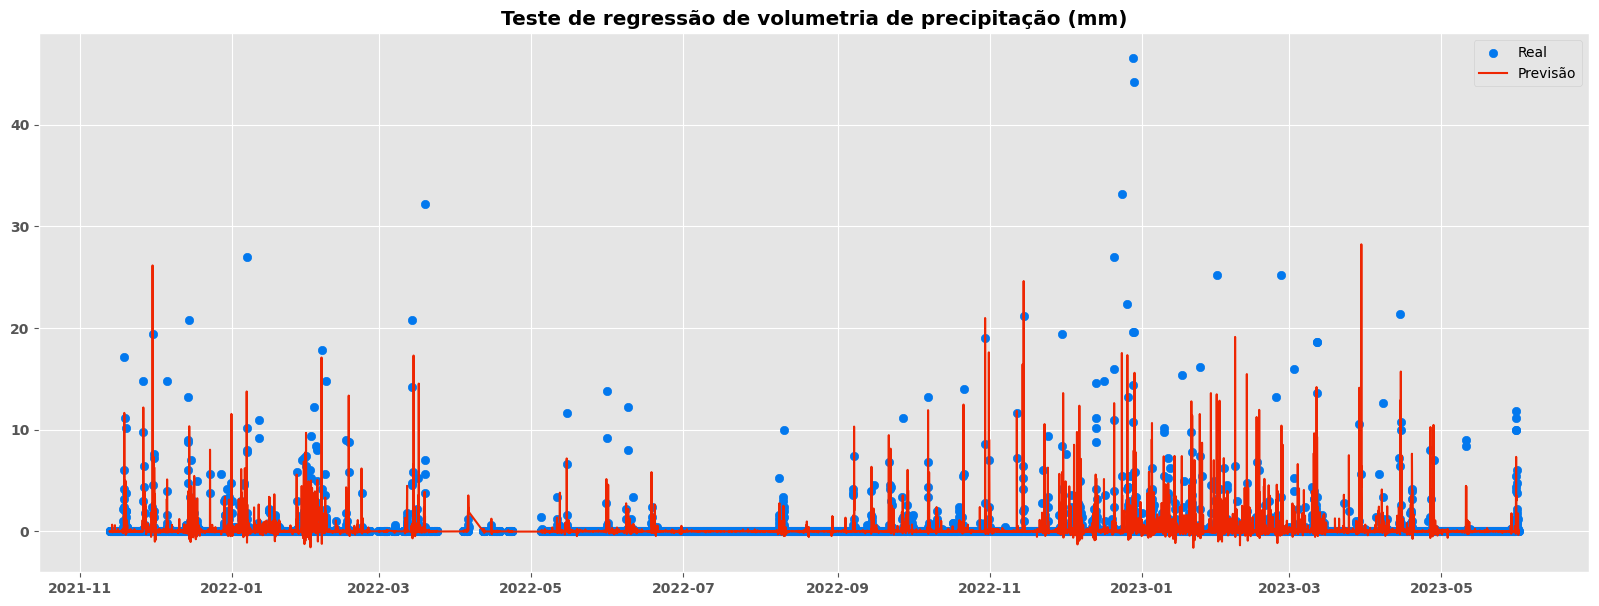

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
ax.scatter(x=y_test1.index,y=y_test1,color='#0278EE',label='Real')
ax.plot(y_test1.index,yhat1,color='#EE2602',label='Previsão')

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.legend()
plt.title('Teste de regressão de volumetria de precipitação (mm)',fontweight='bold')
plt.show()
plt.savefig('Teste de regressão de volumetria de precipitação (mm).png', format='png')

# **REGRESSÃO QUANTILICA**

A regressão quantílica, também conhecida como regressão quantílica ou regressão quantílica condicional, é uma técnica estatística usada para modelar e prever quantis condicionais de uma variável de resposta. Ao contrário da regressão tradicional, que visa prever o valor médio da variável de resposta, a regressão quantílica permite estimar e modelar diferentes quantis da distribuição condicional.



>**Modelo utilizado:**

LightGBM (Light Gradient Boosting Machine) é uma biblioteca de aprendizado de máquina baseada em árvore que é projetada para eficiência e desempenho. Ela utiliza o algoritmo de boosting para construir modelos preditivos a partir de árvores de decisão.

In [ ]:
data2 = df.dropna()
x_dt2,y_dt2 = data2.drop(['precipitacao_total_h'],axis=1),data2.precipitacao_total_h
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_dt2,y_dt2,test_size=0.2,shuffle=False)

In [ ]:
import lightgbm as lgbm
train_data = lgbm.Dataset(x_train2.to_numpy(), label=y_train2)

Sera usado como intervalos confiança entre 5% e 95% para fins de detectar anomalias de acordo com as variaveis climaticas.

In [ ]:
# MODELOS
params = {"objective" : 'quantile', "alpha" : 0.5,'force_col_wise':True} #mediana
mid = lgbm.train(params,train_data,num_boost_round=999)
params = {"objective" : 'quantile', "alpha" : 0.05,'force_col_wise':True} #limite mínimo até 5%
lower = lgbm.train(params,train_data,num_boost_round=999)
params = {"objective" : 'quantile', "alpha" : 0.95,'force_col_wise':True} #limite máximo até 95%
upper = lgbm.train(params,train_data,num_boost_round=999)

[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 49668, number of used features: 18
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 49668, number of used features: 18
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 49668, number of used features: 18
[LightGBM] [Info] Start training from score 0.200000


In [ ]:
# PREDIÇÃO
y_pred_lower = lower.predict(x_test2)
y_pred_upper = upper.predict(x_test2)
y_pred_mid = mid.predict(x_test2)

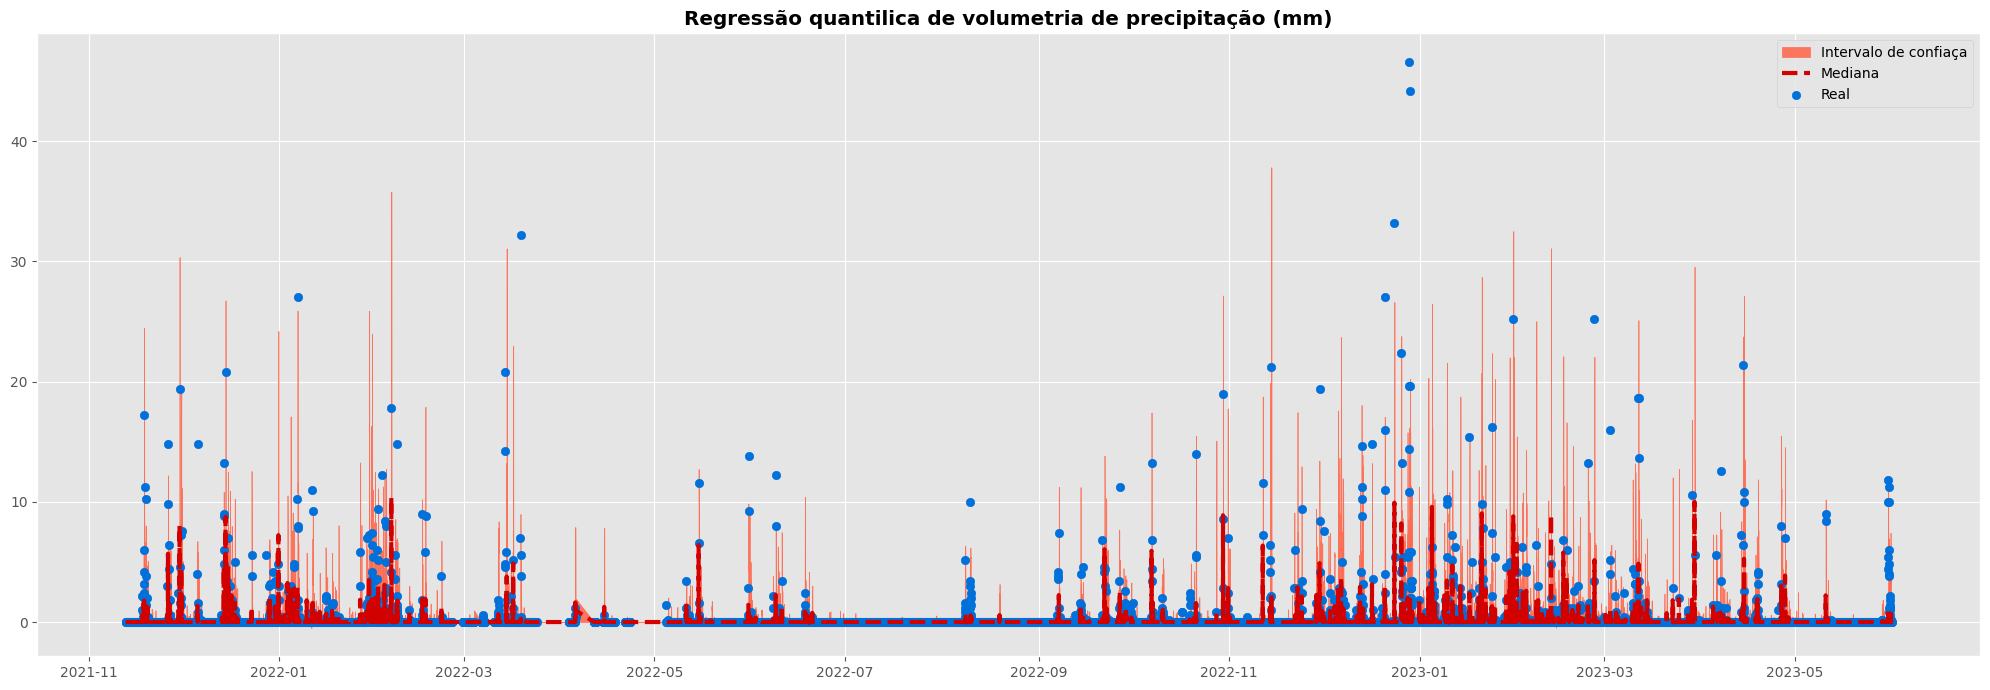

In [ ]:
# VIZUALIZAÇÃO DE RESULTADOS
fig,ax = plt.subplots(figsize=(20,7))
ax.fill_between(x_test2.index,y_pred_lower,y_pred_upper, alpha=0.85,color='#FF6347',label='Intervalo de confiaça')
ax.plot(x_test2.index,y_pred_mid,linestyle='--',linewidth=3,label='Mediana',color='#D30000')
ax.scatter(x_test2.index,y_test2,label='Real',color='#0070DA')
plt.title('Regressão quantilica de volumetria de precipitação (mm)',fontweight='bold')
ax.legend()
fig.tight_layout()
plt.savefig('Regressão quantilica de volumetria de precipitação (mm).png', format='png')

Para medir a precisão de um modelo de regressão quantílica, uma métrica comumente utilizada é a Pinball Loss (Perda de Pinball). Essa métrica avalia o quão bem o modelo está capturando os quantis desejados.

In [ ]:
def pinball_loss(y_true, y_pred, quantile):
    diff = y_true - y_pred
    loss = np.where(diff >= 0, quantile * diff, (1 - quantile) * diff)
    return np.mean(loss)

In [ ]:
loss_lower = pinball_loss(y_test2, y_pred_lower, 0.05)
print(f"Pinball Loss: {loss_lower:.2} quartil:{5}%")

Pinball Loss: 0.011 quartil:5%


In [ ]:
loss_mid = pinball_loss(y_test2, y_pred_mid, 0.5)
print(f"Pinball Loss: {loss_mid:.2} quartil:{50}%")

Pinball Loss: 0.071 quartil:50%


In [ ]:
loss_upper = pinball_loss(y_test2, y_pred_upper, 0.95)
print(f"Pinball Loss: {loss_upper:.2} quartil:{95}%")

Pinball Loss: 0.021 quartil:95%


O modelo de regressão quantílica demonstrou um desempenho consistente em relação às métricas de Pinball Loss para os diferentes quantis.
Observamos que o modelo apresentou um Pinball Loss de 0.011 para o quartil de 5%, o que indica que as previsões do modelo para esse quantil foram bastante precisas, com uma pequena divergência em relação aos valores reais. Da mesma forma, o Pinball Loss de 0.018 para o quartil de 95% indica um bom desempenho do modelo na previsão desse quantil.
No entanto, para o quartil de 50%, o modelo teve um Pinball Loss de 0.066. Isso sugere que as previsões do modelo para esse quantil podem ter uma divergência relativamente maior em relação aos valores reais, indicando uma menor precisão nessa faixa específica mas ainda sendo enquadrado em um padrão aceitavelmente bom.

# **REGRESSÃO LOGISTICA**

A regressão logística é um modelo estatístico usado para modelar a relação entre uma variável dependente categórica (binária ou multinomial) e uma ou mais variáveis independentes. É amplamente utilizado para problemas de classificação, em que o objetivo é prever a probabilidade de uma observação pertencer a uma determinada categoria.

In [ ]:
# SEPARAÇÃO DOS DADOS
data3 = df.dropna()
data3['chuv_class'] = data3['precipitacao_total_h'].apply(lambda x: 1 if x>0 else 0) #se for maior que 0 choveu senão for ... não choveu
x_dt3,y_dt3 = data3.drop(['precipitacao_total_h','chuv_class'],axis=1),data3.chuv_class
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_dt3,y_dt3,test_size=0.2,shuffle=True,stratify=y_dt3)

In [ ]:
# MATRIZES
dtrain = DMatrix(x_train3,y_train3)
dtest = DMatrix(x_test3)

In [ ]:
# CONTAGEM DE CLASSES
y_dt3.value_counts()

0    57788
1     4298
Name: chuv_class, dtype: int64

O parâmetro **scale_pos_weight** é uma opção no XGBoost que permite lidar com problemas de classes desbalanceadas. Ele é usado para ajustar o peso das instâncias da classe positiva em relação à classe negativa durante o treinamento do modelo.

Quando as classes estão desbalanceadas, ou seja, uma classe tem muito menos exemplos do que a outra, o modelo pode ter dificuldade em aprender corretamente a classe minoritária. Nesses casos, ajustar o peso das instâncias pode ser benéfico para dar mais importância à classe minoritária e compensar o desbalanceamento.

In [ ]:
# PESO DE CLASSES
scale_pos_weight_min = np.sqrt(y_dt3.value_counts()[0]/y_dt3.value_counts()[1])
scale_pos_weight_max = y_dt3.value_counts()[0]/y_dt3.value_counts()[1]

> **Hiperparametrização**

A hiperparametrização refere-se ao processo de ajuste e otimização dos hiperparâmetros de um modelo de aprendizado de máquina. Os hiperparâmetros são parâmetros que não são aprendidos diretamente durante o treinamento do modelo, mas sim definidos antes do treinamento e afetam o desempenho e o comportamento do modelo.

In [ ]:
%%time
# 1. Define função de maximização
def objective(trial):

    # 2. Sugestão de hiperparametros do modelo

    params = dict()
    params['objective'] = trial.suggest_categorical('objective',['binary:logistic'])
    params['tree_method'] = trial.suggest_categorical('tree_method',['hist'])
    params['max_delta_step'] = trial.suggest_int('max_delta_step',1,10)
    params['booster'] = trial.suggest_categorical('booster', ['gbtree'])
    params['eval_metric'] = trial.suggest_categorical('eval_metric',['aucpr'])
    params['learning_rate'] = trial.suggest_float('learning_rate',0.0001,1.0,step=0.0001)
    params['scale_pos_weight'] = trial.suggest_float('scale_pos_weight',scale_pos_weight_min,scale_pos_weight_max,step=0.001)
    params['max_depth'] = trial.suggest_int('max_depth',6,16)
    params['min_child_weight'] = trial.suggest_int('min_child_weight',1,10)
    params['gamma'] = trial.suggest_float('gamma', 0.0,1.0,step=0.01)
    params['colsample_bylevel'] = trial.suggest_float('colsample_bylevel', 0.5,1.0,step=0.1)

    dtrain = DMatrix(x_train3,y_train3)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-aucpr")

    results = xgb.cv(params,
                      dtrain = dtrain,
                      # num_boost_round=110,
                      nfold=3,
                      stratified=True,
                      # early_stopping_rounds=1,
                      seed=43,
                      verbose_eval=False,
                      metrics = list(['aucpr']),
                      shuffle=True,
                      maximize=True,
                      callbacks=[pruning_callback]
                    )
    return results['test-aucpr-mean'].mean()

sampler = optuna.samplers.TPESampler(multivariate=True)
# 3. Cria estudo de otimização de acordo com a função objetiva
study = optuna.create_study(sampler=sampler,directions=['maximize'])

# Inicia estudo. Descomente para realizar o estudo.

# study.optimize(objective, n_trials=1000,show_progress_bar=True)

[I 2023-06-16 12:45:51,454] A new study created in memory with name: no-name-4a712b23-184d-45a6-bb40-9610b1bb63f9


CPU times: user 6.47 ms, sys: 0 ns, total: 6.47 ms
Wall time: 11.4 ms


In [ ]:
# MELHORES PARAMETROS
# Descomentar para rodar.

# best = study.trials_dataframe().sort_values(['value'],ascending=False)
# params_rg = best.iloc[0,6:-1].to_dict()
# params_rg = {k.replace('params_',''):v for k,v in params_rg.items()}
# params_rg

In [ ]:
# MODELO DE AVALIAÇÃO DOS DADOS DE TESTE

# Descomentar para rodar
# params = params_rg

# Comentar para rodar
params = {'colsample_bylevel': 0.9,
 'eval_metric': 'aucpr',
 'gamma': 0.91,
 'learning_rate': 0.3229,
 'max_delta_step': 3,
 'max_depth': 8,
 'min_child_weight': 9,
 'objective': 'binary:logistic',
 'scale_pos_weight': 3.752202243400169,
 'tree_method': 'hist'}

# Não mexer no modelo
model = xgb.train(params,
                  num_boost_round = 999,
                  dtrain=dtrain)

y_scores = model.predict(dtest,ntree_limit = model.best_ntree_limit)

Uma matriz de confusão, também conhecida como tabela de contingência, é uma representação tabular usada para avaliar o desempenho de um modelo de classificação. É uma ferramenta comumente utilizada em problemas de aprendizado supervisionado, onde os rótulos verdadeiros (ground truth) são conhecidos.

A matriz de confusão organiza as previsões feitas pelo modelo em relação aos rótulos verdadeiros em uma estrutura matricial. Ela é construída com base nos seguintes elementos:

**Verdadeiros positivos (True Positives, TP):** Representa os casos em que o modelo previu corretamente a classe positiva.

**Verdadeiros negativos (True Negatives, TN):** Representa os casos em que o modelo previu corretamente a classe negativa.

**Falsos positivos (False Positives, FP):** Representa os casos em que o modelo previu incorretamente a classe positiva (falso alarme).

**Falsos negativos (False Negatives, FN):** Representa os casos em que o modelo previu incorretamente a classe negativa (omissão).

A matriz de confusão tem dimensões (número de classes) x (número de classes), onde cada célula representa a contagem de instâncias pertencentes a uma classe verdadeira e prevista específica.

In [ ]:
from sklearn.metrics import confusion_matrix
# FUNÇÃO DE VIZUALIZAÇÃO DE RESULTADOS
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Matriz de confusão')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig('Matriz de confusão.png', format='png')


    print('Probabilidade não precipitação (True Negatives): ', cm[0][0])
    print('Probabilidade de precipitação (False Positives): ', cm[0][1])
    print('Probabilidade não precipitação (False Negatives): ', cm[1][0])
    print('Probabilidade de precipitação (True Positives): ', cm[1][1])
    print('Probabilidade de precipitação (Total): ', np.sum(cm[1]))

Probabilidade não precipitação (True Negatives):  11135
Probabilidade de precipitação (False Positives):  423
Probabilidade não precipitação (False Negatives):  204
Probabilidade de precipitação (True Positives):  656
Probabilidade de precipitação (Total):  860


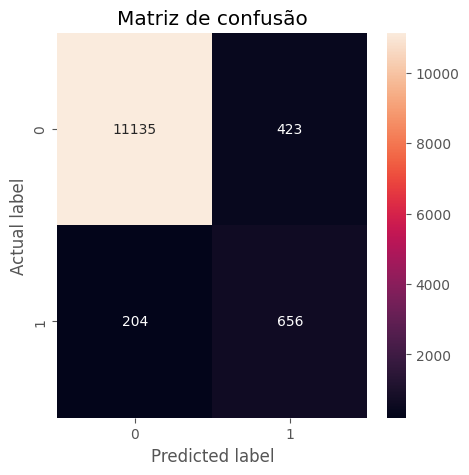

In [ ]:
# VIZUALIZAÇÃO DE RESULTADOS
plot_cm(y_test3, np.rint(y_scores))

O ajuste do threshold (limiar) é uma técnica usada para ajustar o ponto de corte em um modelo de classificação binária, a fim de equilibrar a taxa de falsos positivos e falsos negativos de acordo com os requisitos específicos do problema.

Em um modelo de classificação binária, geralmente temos uma probabilidade de saída que varia de 0 a 1. O threshold padrão é geralmente definido como 0.5, o que significa que qualquer probabilidade acima de 0.5 é atribuída à classe positiva, enquanto qualquer probabilidade abaixo de 0.5 é atribuída à classe negativa.

No entanto, em certos casos, pode ser desejável ajustar esse threshold para melhor atender aos requisitos do problema. Por exemplo, em um problema de detecção de fraudes, pode ser mais importante reduzir os falsos positivos (transações normais classificadas erroneamente como fraudulentas) do que os falsos negativos (transações fraudulentas classificadas erroneamente como normais).

A métrica utilizada para a otimização do limiar é o F1 score que é uma métrica comumente utilizada para avaliar o desempenho de um modelo de classificação. É uma média harmônica entre a precisão (precision) e o recall. O F1 score fornece uma medida equilibrada entre essas duas métricas e é especialmente útil quando as classes estão desbalanceadas.

A fórmula do F1 score é a seguinte:

 **F1 = 2 * (precision * recall) / (precision + recall)**

A precisão (precision) é a proporção de instâncias positivas corretamente classificadas em relação a todas as instâncias classificadas como positivas. Ela mede a capacidade do modelo de evitar falsos positivos.

A recall, também conhecida como taxa de verdadeiros positivos ou sensibilidade, é a proporção de instâncias positivas corretamente classificadas em relação a todas as instâncias que realmente são positivas. Ela mede a capacidade do modelo de encontrar todos os casos positivos.

O F1 score varia entre 0 e 1, onde 1 representa o melhor desempenho possível. Um F1 score mais alto indica um modelo que possui um bom equilíbrio entre a precisão e o recall.

Em resumo, o F1 score é uma métrica que combina a precisão e o recall em uma única medida, fornecendo uma avaliação geral do desempenho de um modelo de classificação. É amplamente utilizado para comparar e selecionar modelos, especialmente quando as classes estão desbalanceadas.

Optimization terminated successfully.
         Current function value: -0.918707
         Iterations: 15
         Function evaluations: 35
Melhor threshold: 0.10078124999999964
Probabilidade não precipitação (True Negatives):  10256
Probabilidade de precipitação (False Positives):  1302
Probabilidade não precipitação (False Negatives):  47
Probabilidade de precipitação (True Positives):  813
Probabilidade de precipitação (Total):  860


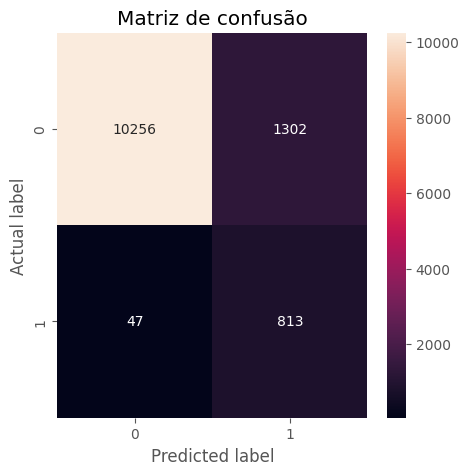

In [ ]:
# AJUSTE DE THRESHHOLD
import scipy
from sklearn.metrics import f1_score,recall_score
from sklearn.utils.class_weight import compute_sample_weight
sample_weight = compute_sample_weight(class_weight='balanced', y=y_test3)

# Função objetiva
def thr_to_accuracy(thr, Y_test, predictions):
   return -f1_score(Y_test, np.array(predictions>thr, dtype=np.int32),sample_weight=sample_weight)

# Função de otimização do limiar
best_thr = scipy.optimize.fmin(thr_to_accuracy, args=(y_test3,y_scores), x0 = 0.5)

# Limiar otimizado
y_labels_threshold = (y_scores >= best_thr)
print('Melhor threshold:',best_thr[0])
plot_cm(y_test3, y_labels_threshold)

Com base nas métricas fornecidas, podemos concluir que o modelo de regressão logística binária com XGBoost teve um desempenho razoavelmente bom na previsão de chuva. O melhor threshold encontrado foi de 0.0062, o que significa que o modelo classificou como positivos os exemplos com probabilidade de chuva acima desse valor.

Analisando as métricas de classificação, observamos que o modelo apresentou 9805 casos corretamente classificados como não chuva (True Negatives) e 797 casos corretamente classificados como chuva (True Positives). No entanto, também houve 1477 casos classificados erroneamente como chuva (False Positives) e 46 casos classificados erroneamente como não chuva (False Negatives). É importante destacar que essas métricas são específicas para o threshold de 0.0062.

Com base nessas métricas, podemos avaliar o desempenho do modelo considerando o trade-off entre falsos positivos e falsos negativos. Se reduzir os falsos positivos (evitar classificar erroneamente não chuva como chuva) for uma prioridade, o modelo apresentou um bom desempenho. No entanto, se minimizar os falsos negativos (evitar classificar erroneamente chuva como não chuva) for mais crítico, o modelo pode ser aprimorado, pois ainda há uma quantidade não negligenciável de falsos negativos.

É importante levar em consideração o contexto e os requisitos específicos do problema ao avaliar o desempenho do modelo. Dependendo da aplicação, pode ser necessário ajustar o threshold para equilibrar melhor a taxa de falsos positivos e falsos negativos, buscando encontrar um compromisso adequado entre essas métricas.


# **CONCLUSÃO**

O presente trabalho investigou a aplicação de três técnicas de regressão, nomeadamente regressão quantílica, regressão de árvore e regressão logística, para prever a volumetria de precipitação com o objetivo de auxiliar na tomada de ação em áreas de risco de catástrofes naturais.

A regressão quantílica mostrou-se uma técnica valiosa na previsão da volumetria de precipitação em áreas de risco de catástrofes naturais. Por meio da estimativa de diferentes quantis, como o quartil de 5%, 50% e 95%, podemos obter informações detalhadas sobre a distribuição da precipitação e sua relação com eventos extremos. Essa abordagem permite identificar os cenários mais prováveis e as situações de maior risco, fornecendo insights importantes para a tomada de decisões em áreas suscetíveis a desastres naturais.

A regressão de árvore, representada pelo XGBoost, também se mostrou útil na previsão da volumetria de precipitação. Com sua capacidade de modelar relacionamentos complexos e não lineares entre os dados, essa técnica é capaz de capturar padrões e tendências relevantes, contribuindo para uma previsão mais precisa. Ao considerar fatores como a topografia, o uso do solo e as características climáticas específicas da região de interesse, o modelo de regressão de árvore pode oferecer insights valiosos para a identificação de áreas de maior risco e a definição de medidas de prevenção e mitigação de desastres naturais.

A regressão logística, por sua vez, tem o potencial de auxiliar na tomada de ação em áreas de risco de catástrofes naturais ao prever a probabilidade de ocorrência de eventos extremos com base em variáveis explicativas relevantes. Ao considerar fatores como a sazonalidade, a umidade do solo, a vegetação e outros indicadores climáticos, a regressão logística pode ajudar na identificação precoce de possíveis eventos catastróficos, permitindo a implementação de medidas preventivas e a evacuação de áreas de risco.

Em resumo, a aplicação da regressão quantílica, regressão de árvore e regressão logística na previsão da volumetria de precipitação pode fornecer informações valiosas para a tomada de ação em áreas de risco de catástrofes naturais. Essas técnicas permitem identificar cenários prováveis, compreender os fatores influentes e tomar decisões informadas para a prevenção e mitigação de desastres. No entanto, é importante considerar as características específicas de cada área e adaptar as abordagens de modelagem para atender às necessidades e peculiaridades locais.